In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

from subprocess import check_output

In [2]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [3]:
def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])

In [4]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

In [5]:
df_train = pd.read_csv("dataset regionall.csv")
df_train.head()

,Daerah,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
0,Kab. Lebak,340,53680341,2015,126.42,9.97,1268.004012,62.030000,4436.20,6.20
1,Kab. Pandeglang,326,51469974,2015,124.42,10.43,1192.905081,62.720000,5067.20,5.81
2,Kab. Serang,326,51469974,2015,74.85,5.09,1470.530452,64.610000,3954.27,5.09
3,Kab. Tangerang,246,38839306,2015,191.12,5.71,3347.110333,70.050000,4784.90,5.60
4,Kab. Bandung,270,54265335,2015,281.04,8.00,3513.000000,70.048031,4863.23,5.89


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 10 columns):
Daerah         340 non-null object
sumDesa        340 non-null int64
danadesa       340 non-null int64
tahun          340 non-null int64
miskin         340 non-null float64
miskin_perc    340 non-null float64
populasi       340 non-null float64
ipm            255 non-null float64
pdrb_tani      255 non-null float64
pdrb_growth    255 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 26.6+ KB


In [7]:
i = df_train.loc[df_train["Daerah"]=="Indonesia"]
i

,Daerah,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
84,Indonesia,74754,9066200000,2015,28513.57,11.13,256186.6128,69.55,1171445.8,4.88
169,Indonesia,74754,49982080000,2016,27764.32,10.70,259479.6262,70.18,1210955.5,5.03
339,Indonesia,74954,60000000000,2018,25674.58,9.66,265782.4020,NaN,NaN,NaN


In [8]:
t2017 = df_train.loc[df_train["tahun"] == 2017]
t2017.tail()

,Daerah,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
250,Kab. Bantul,75,77730491,2017,139.67,14.07,992.679460,78.67,2032.34,5.10
251,Kab. Gunung Kidul,144,132353781,2017,135.74,18.65,727.828418,68.73,2664.85,5.00
252,Kab. Kulon Progo,87,77627477,2017,84.17,20.03,420.219671,73.23,1178.49,5.97
253,Kab. Sleman,86,80855810,2017,96.75,8.13,1190.036900,82.85,2047.96,5.35
254,Indonesia,74954,60000000000,2017,26582.99,10.12,262677.766800,70.81,1257875.50,5.07


In [9]:
data = df_train.drop([84,169,254,339])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 338
Data columns (total 10 columns):
Daerah         336 non-null object
sumDesa        336 non-null int64
danadesa       336 non-null int64
tahun          336 non-null int64
miskin         336 non-null float64
miskin_perc    336 non-null float64
populasi       336 non-null float64
ipm            252 non-null float64
pdrb_tani      252 non-null float64
pdrb_growth    252 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 28.9+ KB


In [10]:
data.describe()

,sumDesa,danadesa,tahun,miskin,miskin_perc,populasi,ipm,pdrb_tani,pdrb_growth
count,336.000000,3.360000e+02,336.000000,336.000000,336.000000,336.000000,252.000000,252.000000,252.000000
mean,261.660714,1.671561e+08,2016.500000,151.663661,12.231875,1325.071555,68.318097,4657.302817,5.418651
std,97.395567,1.308894e+08,1.119701,75.211058,4.116944,814.398000,3.920843,2567.924541,1.978051
min,16.000000,1.000000e+00,2015.000000,7.980000,3.890000,181.106613,58.180000,331.330000,0.080000
25%,197.500000,6.375675e+07,2015.750000,99.060000,9.655000,868.980686,65.520000,3062.472500,5.037500
50%,266.000000,1.676770e+08,2016.500000,136.370000,11.690000,1150.138658,68.115000,3936.815000,5.295000
75%,327.000000,2.302680e+08,2017.250000,191.402500,14.382500,1553.576661,70.447500,5794.902500,5.712500
max,469.000000,1.745276e+09,2018.000000,490.800000,25.690000,5812.605000,82.850000,15612.160000,23.530000


In [11]:
data = data.drop(["miskin", "miskin_perc", "ipm", "pdrb_tani", "pdrb_growth"], axis=1)
data = data.set_index("Daerah")
data.head()

,sumDesa,danadesa,tahun,populasi
Daerah,,,,
Kab. Lebak,340,53680341,2015,1268.004012
Kab. Pandeglang,326,51469974,2015,1192.905081
Kab. Serang,326,51469974,2015,1470.530452
Kab. Tangerang,246,38839306,2015,3347.110333
Kab. Bandung,270,54265335,2015,3513.000000


In [26]:
data.describe()

,sumDesa,danadesa,tahun,populasi
count,336.000000,3.360000e+02,336.000000,336.000000
mean,261.660714,1.671561e+08,2016.500000,1325.071555
std,97.395567,1.308894e+08,1.119701,814.398000
min,16.000000,1.000000e+00,2015.000000,181.106613
25%,197.500000,6.375675e+07,2015.750000,868.980686
50%,266.000000,1.676770e+08,2016.500000,1150.138658
75%,327.000000,2.302680e+08,2017.250000,1553.576661
max,469.000000,1.745276e+09,2018.000000,5812.605000


In [12]:
t2018 = data.loc[data["tahun"]==2018]
t2018["ddperkap"] = t2018["danadesa"] / t2018["populasi"]
t2018.tail()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sumDesa,danadesa,tahun,populasi,ddperkap
Daerah,,,,,
Kota Batu,19,21641636,2018,205.141,105496.395162
Kab. Bantul,75,81576312,2018,1004.021,81249.607329
Kab. Gunung Kidul,144,118761945,2018,734.579,161673.482362
Kab. Kulon Progo,87,77889191,2018,424.699,183398.574049
Kab. Sleman,86,83666949,2018,1203.137,69540.666607


In [13]:
t2017 = data.loc[data["tahun"]==2017]
t2017["ddperkap"] = t2017["danadesa"] / t2017["populasi"]
t2017.tail()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sumDesa,danadesa,tahun,populasi,ddperkap
Daerah,,,,,
Kota Batu,19,18852611,2017,203.480278,92650.802074
Kab. Bantul,75,77730491,2017,992.679460,78303.716504
Kab. Gunung Kidul,144,132353781,2017,727.828418,181847.503739
Kab. Kulon Progo,87,77627477,2017,420.219671,184730.707412
Kab. Sleman,86,80855810,2017,1190.036900,67943.951990


In [14]:
t2016 = data.loc[data["tahun"]==2016]
t2016["ddperkap"] = t2016["danadesa"] / t2016["populasi"]
t2016.tail()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sumDesa,danadesa,tahun,populasi,ddperkap
Daerah,,,,,
Kota Batu,19,14572714,2016,202.008929,72138.959901
Kab. Bantul,75,60601265,2016,981.168385,61764.388185
Kab. Gunung Kidul,144,103567918,2016,719.493278,143945.636656
Kab. Kulon Progo,87,60511729,2016,415.467980,145647.154219
Kab. Sleman,86,63014717,2016,1176.979294,53539.359037


In [15]:
t2015 = data.loc[data["tahun"]==2015]
t2015["ddperkap"] = t2015["danadesa"] / t2015["populasi"]
t2015.tail()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sumDesa,danadesa,tahun,populasi,ddperkap
Daerah,,,,,
Kota Batu,19,2856833,2015,200.212314,14269.017425
Kab. Bantul,75,21559226,2015,980.710349,21983.275714
Kab. Gunung Kidul,144,41393714,2015,713.299586,58031.316468
Kab. Kulon Progo,87,2500802,2015,411.822430,6072.524997
Kab. Sleman,86,24721246,2015,1172.938689,21076.332661


In [22]:
t2018.describe()

,sumDesa,danadesa,tahun,populasi,ddperkap
count,84.000000,8.400000e+01,84.0,84.000000,84.000000
mean,261.654762,2.238780e+08,2018.0,1343.254155,187528.250835
std,97.825083,8.365258e+07,0.0,845.536381,67360.217921
min,16.000000,1.773252e+07,2018.0,182.632000,54836.024798
25%,197.500000,1.671173e+08,2018.0,875.479500,151164.935567
50%,266.000000,2.266994e+08,2018.0,1158.253500,185985.589649
75%,327.000000,2.805876e+08,2018.0,1568.982000,227643.267900
max,469.000000,4.029849e+08,2018.0,5812.605000,454791.919133


In [23]:
t2017.describe()

,sumDesa,danadesa,tahun,populasi,ddperkap
count,84.000000,8.400000e+01,84.0,84.000000,84.000000
mean,261.654762,2.153417e+08,2017.0,1331.158603,183094.074704
std,97.825083,8.173081e+07,0.0,826.616264,67684.034123
min,16.000000,2.144700e+05,2017.0,182.294618,235.352209
25%,197.500000,1.644107e+08,2017.0,869.519701,140380.394861
50%,266.000000,2.146562e+08,2017.0,1152.976589,181906.325365
75%,327.000000,2.711158e+08,2017.0,1558.413223,229879.527885
max,469.000000,3.634235e+08,2017.0,5685.880980,347657.068285


In [24]:
t2016.describe()

,sumDesa,danadesa,tahun,populasi,ddperkap
count,84.000000,8.400000e+01,84.0,84.000000,8.400000e+01
mean,261.666667,1.876316e+08,2016.0,1319.078057,1.587235e+05
std,97.844151,1.822085e+08,0.0,808.497753,1.406375e+05
min,16.000000,1.264106e+07,2016.0,181.740371,3.999242e+04
25%,197.500000,1.296492e+08,2016.0,866.939202,1.106294e+05
50%,266.000000,1.683221e+08,2016.0,1147.536742,1.431351e+05
75%,327.000000,2.105559e+08,2016.0,1544.388127,1.815569e+05
max,469.000000,1.745276e+09,2016.0,5558.323896,1.351151e+06


In [25]:
t2015.describe()

,sumDesa,danadesa,tahun,populasi,ddperkap
count,84.000000,8.400000e+01,84.0,84.000000,84.000000
mean,261.666667,4.177280e+07,2015.0,1306.795403,34969.445211
std,97.844151,1.813997e+07,0.0,790.131486,14613.058867
min,16.000000,1.000000e+00,2015.0,181.106613,0.002564
25%,197.500000,3.078613e+07,2015.0,861.005542,24810.528097
50%,266.000000,3.874086e+07,2015.0,1141.385154,35577.167414
75%,327.000000,5.202000e+07,2015.0,1530.166954,42988.586795
max,469.000000,8.461373e+07,2015.0,5436.383929,90206.270891


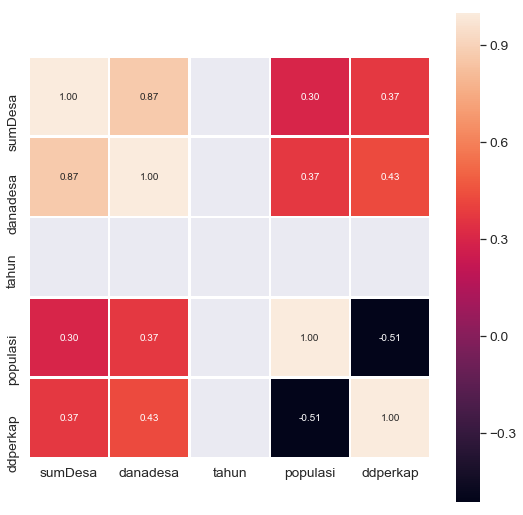

In [27]:

sns.set(font_scale=1.25)
sns.heatmap(t2017.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                
            )
plt.show()

<Figure size 792x792 with 0 Axes>

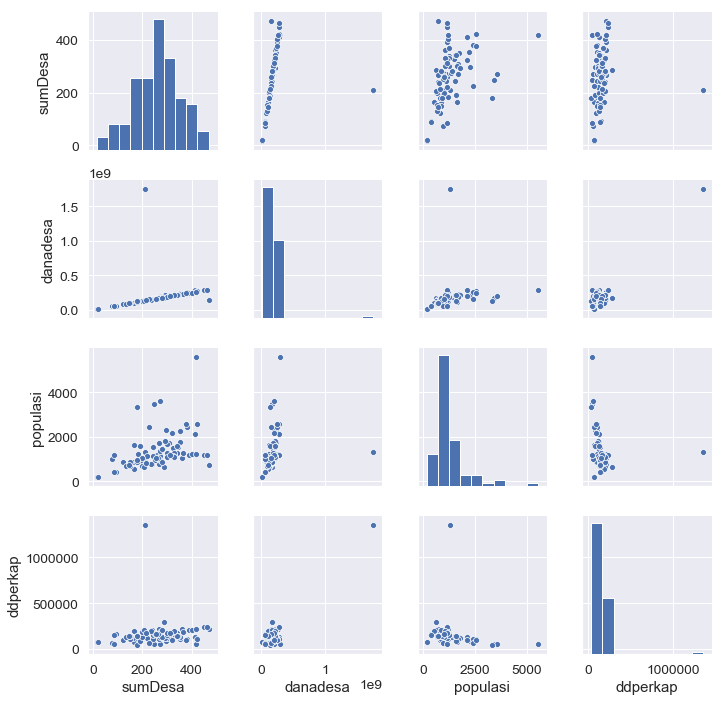

In [38]:
plt.figure(figsize=(11, 11))
sns.pairplot(t2016[['sumDesa','danadesa','populasi','ddperkap']])
plt.show()